In [22]:
%matplotlib inline
import error_kmers
import numpy as np
import scipy
import scipy.signal
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
tabund = np.loadtxt('tabund.txt.gz', dtype = int)
eabund = np.loadtxt('eabund.txt.gz', dtype = int)

In [8]:
eweight = np.true_divide(eabund,tabund)
tcounts = np.bincount(tabund)
ecounts = np.bincount(tabund, weights = eweight)
perror = np.true_divide(ecounts, tcounts)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


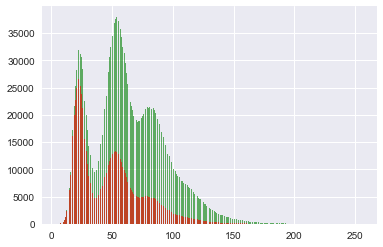

In [23]:

sns.set()
h, bins = np.histogram(tabund, bins = 'auto')
sns.distplot(tabund, bins=bins, color = "g", hist_kws = {'alpha' : 0.6}, kde = False, norm_hist = False)
sns.distplot(tabund, bins=bins, hist_kws={'weights' : eweight, 'alpha' : 0.6}, color = "r", kde = False, norm_hist=False)

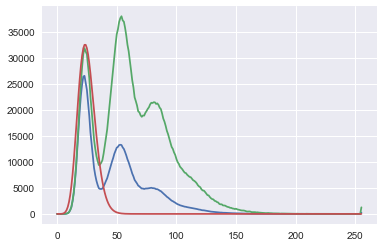

In [57]:
x = np.arange(len(tcounts))
plt.plot(x,ecounts)
plt.plot(x,tcounts)

lambda_ests = scipy.signal.argrelmax(tcounts)[0]
err_lambda = lambda_ests[0]
tot_lambda = lambda_ests[1]
def nbparam(r,l):
    return l/(l+r)
r = err_lambda + 1
dist = scipy.stats.nbinom(r,nbparam(r,err_lambda))
est_errs = dist.pmf(x) / dist.pmf(dist.median()) * tcounts[err_lambda]

plt.plot(x,est_errs)
# est_errs